In [24]:
import cv2
import numpy as np
from SVD import SVD
import matplotlib.pyplot as plt

## Read image "lena.jpg"

In [25]:
lena = "dog.jpg"
images = cv2.imread(lena, 0)
print("images shape: ", images.shape)
images

images shape:  (500, 350)


array([[104, 105, 107, ..., 140, 139, 139],
       [103, 105, 106, ..., 140, 140, 139],
       [103, 104, 106, ..., 142, 141, 141],
       ...,
       [158, 159, 160, ..., 143, 135, 125],
       [158, 159, 159, ..., 141, 135, 125],
       [157, 158, 160, ..., 140, 136, 126]], dtype=uint8)

In [26]:
print("Images rank:", np.linalg.matrix_rank(images))

Images rank: 350


## Show image

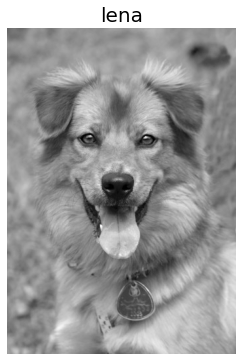

In [27]:
plt.figure(figsize=(6, 6))
plt.imshow(images, cmap="gray")
plt.title("lena", fontsize=20)
plt.axis("off")
plt.show()

## Normalize function
# $\hat{x} = \frac{x-µ}{σ}$

In [28]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std==0.] = 1.
    norm = (X - mean) / std
    return norm, mean, std

## Normalize images

In [29]:
# matx = images
matx, mean, std = normalize(images)
print("Images after normalize:")
matx

Images after normalize:


array([[-2.44024621, -2.39410375, -2.30273864, ..., -0.42725202,
        -0.44570647, -0.45397948],
       [-2.49894548, -2.39410375, -2.36406323, ..., -0.42725202,
        -0.4184161 , -0.45397948],
       [-2.49894548, -2.45385775, -2.36406323, ..., -0.37265112,
        -0.39112572, -0.39925678],
       ...,
       [ 0.72951457,  0.83261223,  0.94746503, ..., -0.34535067,
        -0.55486799, -0.83703835],
       [ 0.72951457,  0.83261223,  0.88614043, ..., -0.39995157,
        -0.55486799, -0.83703835],
       [ 0.6708153 ,  0.77285823,  0.94746503, ..., -0.42725202,
        -0.52757761, -0.809677  ]])

## Singular values decomposition
## $ A = UΣV^{T}$

In [30]:
svd = SVD(matx)
U, E, Vt = svd.svd()
print("Vector U shape:", U.shape)
print("Vector Σ shape:", E.shape)
print("Vector V^T shape:", Vt.shape)

Vector U shape: (500, 500)
Vector Σ shape: (350,)
Vector V^T shape: (350, 350)


## Vector $U$

In [31]:
print("vector U:\n", U)

vector U:
 [[-0.00517951 -0.03237152 -0.03165427 ...  0.00227514  0.00607781
   0.00607781]
 [-0.00422114 -0.03215855 -0.03053813 ...  0.05621585 -0.03186047
  -0.03186047]
 [-0.00324537 -0.03121049 -0.0293663  ...  0.0117387  -0.01545558
  -0.01545558]
 ...
 [-0.02978836 -0.00071308  0.04154151 ... -0.03786888  0.02972562
   0.02972562]
 [-0.03104675  0.00433468  0.04206155 ...  0.01592174  0.02534893
   0.02534893]
 [-0.03291479  0.00722764  0.0423606  ...  0.03064255 -0.01311542
  -0.01311542]]


## Vector $Σ$

In [32]:
print("Vector Σ:\n", E)

Vector Σ:
 [2.16696056e+02 1.72734434e+02 1.44822993e+02 1.24261766e+02
 9.71227000e+01 9.11020602e+01 7.78641133e+01 7.28372947e+01
 6.40880886e+01 5.90946785e+01 5.61172908e+01 4.75975005e+01
 4.14740284e+01 4.06144896e+01 3.47608337e+01 3.43845764e+01
 3.11772134e+01 2.98945157e+01 2.76108870e+01 2.62962754e+01
 2.50270518e+01 2.41810897e+01 2.31186847e+01 2.25864725e+01
 2.15822912e+01 2.05618938e+01 1.94956759e+01 1.87578046e+01
 1.81187883e+01 1.80571140e+01 1.74617902e+01 1.67062276e+01
 1.58888910e+01 1.54883918e+01 1.44369958e+01 1.42067156e+01
 1.40646077e+01 1.37158652e+01 1.34428819e+01 1.30429764e+01
 1.27930712e+01 1.20040560e+01 1.17201254e+01 1.14624490e+01
 1.12294813e+01 1.09173319e+01 1.08743836e+01 1.03991333e+01
 1.02984174e+01 9.62545318e+00 9.36781926e+00 9.11343473e+00
 9.02987251e+00 8.79520971e+00 8.51491031e+00 8.30876351e+00
 8.22191928e+00 8.07154514e+00 7.88949779e+00 7.80714906e+00
 7.68774755e+00 7.60477528e+00 7.50377092e+00 7.45735491e+00
 7.06321058e+

## Vector $V^{T}$

In [33]:
print("Vector V^T\n", Vt[:5])

Vector V^T
 [[ 0.03468707  0.03494698  0.03397424 ... -0.06268209 -0.06287979
  -0.06286135]
 [-0.0009019   0.00365644  0.00817538 ...  0.01502449  0.01639662
   0.0159726 ]
 [ 0.00448625  0.0069176   0.01059025 ... -0.06103011 -0.05922163
  -0.05884016]
 [ 0.00473272  0.00314707 -0.00131353 ... -0.06104256 -0.05930541
  -0.05545186]
 [ 0.09794619  0.10102595  0.10634802 ... -0.06245227 -0.06541153
  -0.06949314]]


## Find matrix rapproximation with error $<=$ 20%

In [34]:
rank = 1
error = None
matx_rank = None
while True:
    matx_rank, error = svd.matrix_approximation(rank)
    if error <= 0.2:
        break
    else: rank += 1
print("with rank=", rank, "-Error=", error)

with rank= 60 -Error= 0.1994680527052488


## Show orginal image and image with error <= 20%

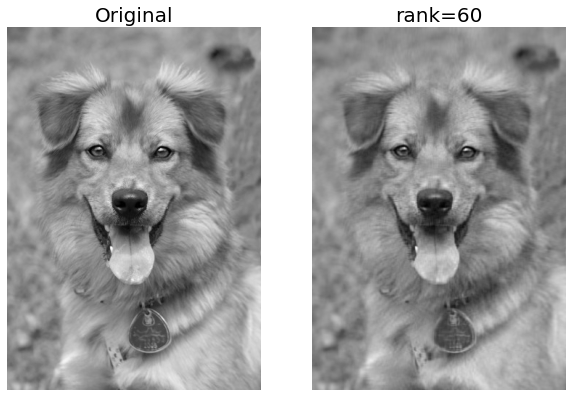

In [35]:
reconstruct = matx_rank * std + mean
img = [images, reconstruct]
title = ["Original", "rank="+str(rank)]
plt.figure(figsize=(10, 10))
for i in range(2):
    plt.subplot(120 + i + 1)
    plt.imshow(img[i], cmap="gray")
    plt.title(title[i], fontsize=20)
    plt.axis("off")
plt.show()

## Try with different ranks and show them
### Rank = [4, 10, 15, 25, 50]

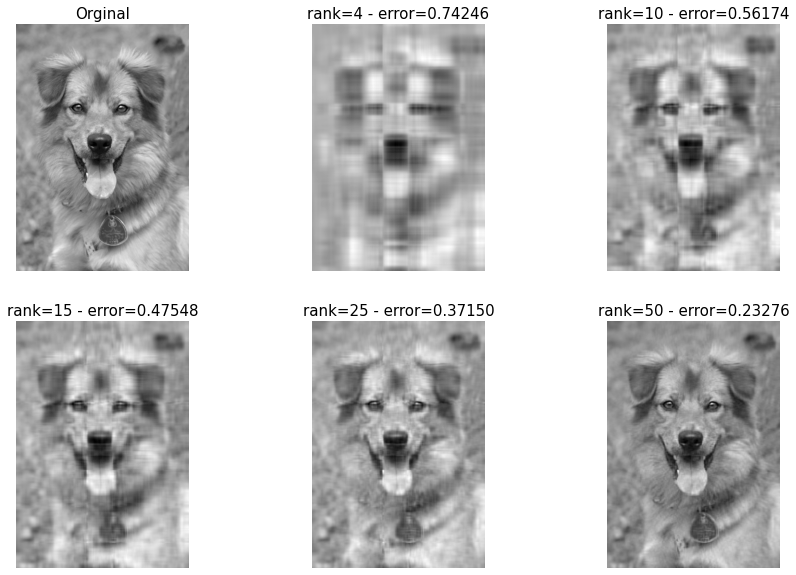

In [42]:
matx_app = dict()
errors = dict()

# Calculate matrix rapproximation with rank [4, 10, 15, 25, 50]
for ranks in [4, 10, 15, 25, 50]:
    matx_app[ranks], e = svd.matrix_approximation(ranks)
    matx_app[ranks] = matx_app[ranks] * std + mean
    errors[ranks] = e
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 10)

# Show images
# Original image
ax[0, 0].imshow(images, cmap="gray")
ax[0, 0].set_title("Orginal", fontsize=15)
ax[0, 0].axis("off")

# Image rank 4
ax[0, 1].imshow(matx_app[4], cmap="gray")
ax[0, 1].set_title("rank={:d} - error={:.5f}".format(4, errors[4]), fontsize=15)
ax[0, 1].axis("off")

# Image rank 10
ax[0, 2].imshow(matx_app[10], cmap="gray")
ax[0, 2].set_title("rank={:d} - error={:.5f}".format(10, errors[10]), fontsize=15)
ax[0, 2].axis("off")

# Image rank 15
ax[1, 0].imshow(matx_app[15], cmap="gray")
ax[1, 0].set_title("rank={:d} - error={:.5f}".format(15, errors[15]), fontsize=15)
ax[1, 0].axis("off")

# Image rank 25
ax[1, 1].imshow(matx_app[25], cmap="gray")
ax[1, 1].set_title("rank={:d} - error={:.5f}".format(25, errors[25]), fontsize=15)
ax[1, 1].axis("off")

# Image rank 50
ax[1, 2].imshow(matx_app[50], cmap="gray")
ax[1, 2].set_title("rank={:d} - error={:.5f}".format(50, errors[50]), fontsize=15)
ax[1, 2].axis("off")
plt.show()


In [38]:
m,_ = svd.matrix_approximation(350)
m * std + mean

array([[104., 105., 107., ..., 140., 139., 139.],
       [103., 105., 106., ..., 140., 140., 139.],
       [103., 104., 106., ..., 142., 141., 141.],
       ...,
       [158., 159., 160., ..., 143., 135., 125.],
       [158., 159., 159., ..., 141., 135., 125.],
       [157., 158., 160., ..., 140., 136., 126.]])

In [39]:
images

array([[104, 105, 107, ..., 140, 139, 139],
       [103, 105, 106, ..., 140, 140, 139],
       [103, 104, 106, ..., 142, 141, 141],
       ...,
       [158, 159, 160, ..., 143, 135, 125],
       [158, 159, 159, ..., 141, 135, 125],
       [157, 158, 160, ..., 140, 136, 126]], dtype=uint8)